ANALYSE DU PIB MONDIAL 2024

1. CLASSEMENT DES 15 PREMIÈRES ÉCONOMIES MONDIALES

        Pays  PIB_2024  Croissance_%  Part_mondiale_%
  États-Unis     27360          1.52            34.40
       Chine     17960          2.51            22.58
   Allemagne      4430          2.78             5.57
       Japon      4230          2.92             5.32
        Inde      3890          8.96             4.89
 Royaume-Uni      3340          1.83             4.20
      France      3050          3.04             3.84
      Italie      2250          2.74             2.83
      Brésil      2170          1.88             2.73
      Canada      2140          2.39             2.69
      Russie      2020          2.02             2.54
Corée du Sud      1810          2.84             2.28
   Australie      1730          2.37             2.18
     Espagne      1580          2.60             1.99
     Mexique      1570          2.61             1.97

2. STATISTIQUES GLOBALES

PIB total des 15 pays: $79,5

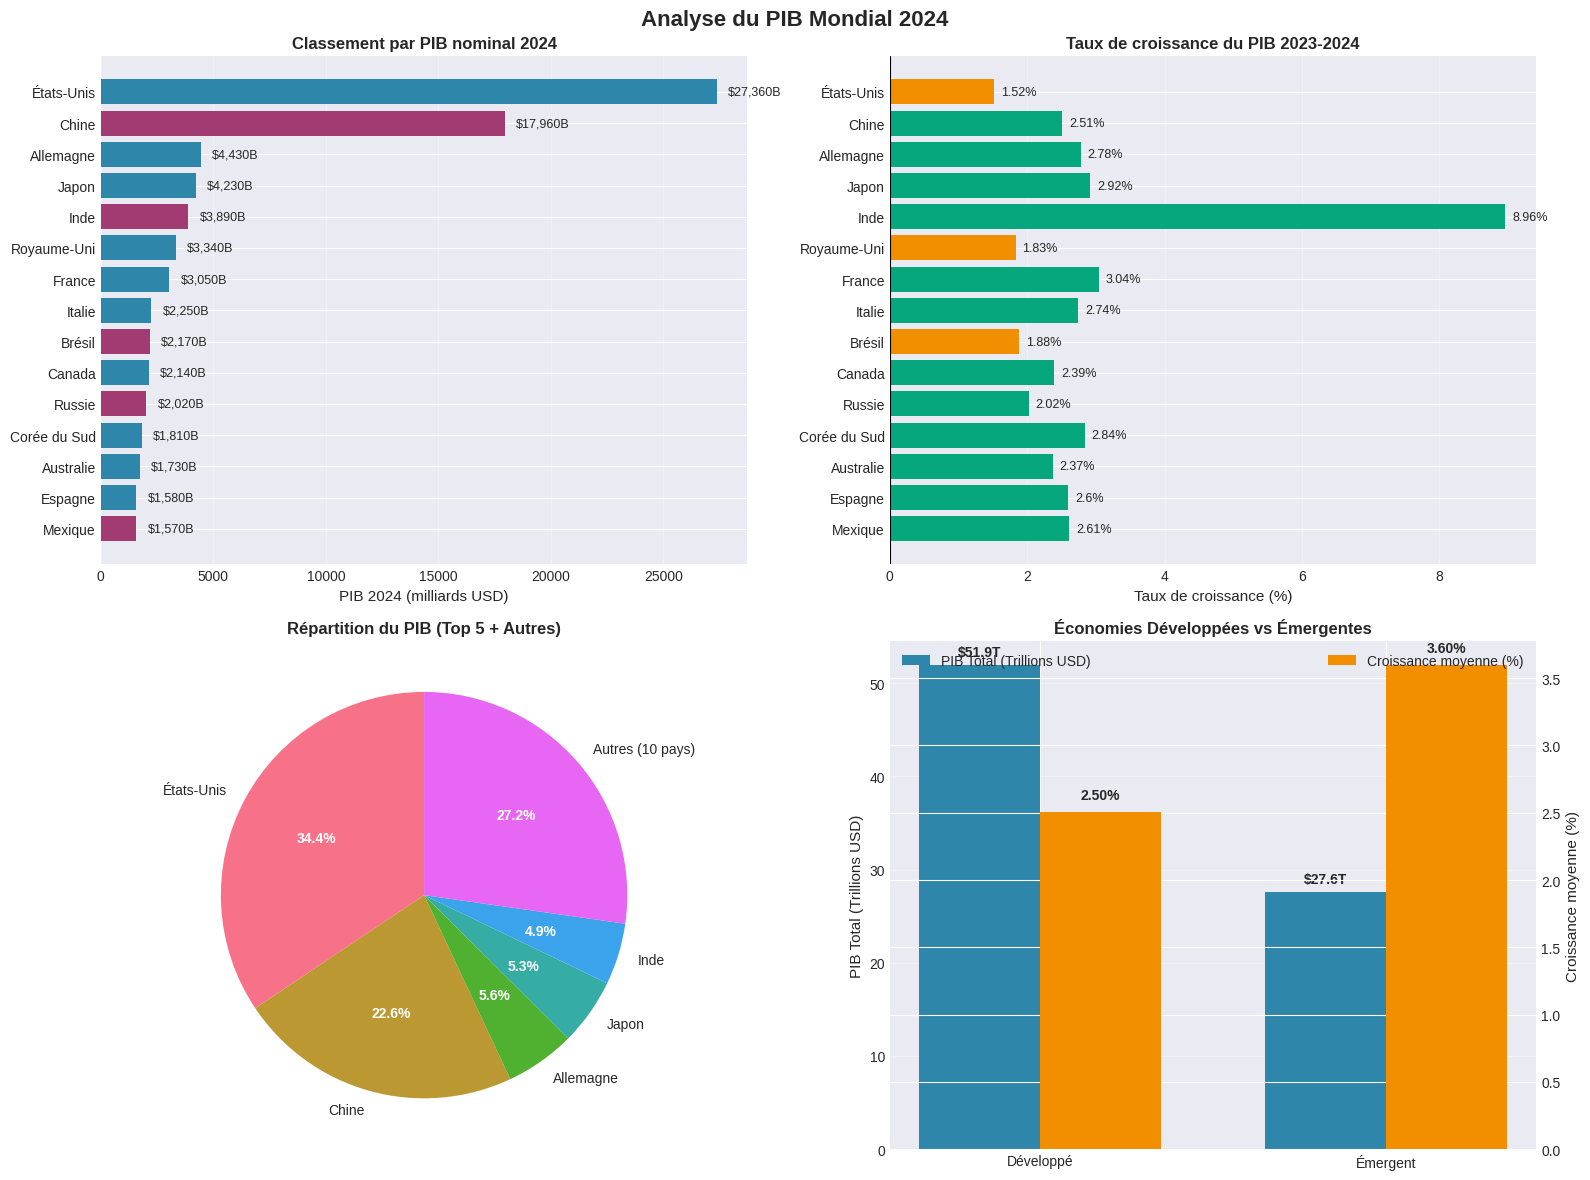


4. TENDANCES ET OBSERVATIONS CLÉS

🔹 Pays avec la plus forte croissance:
   - Inde: 8.96%
   - France: 3.04%
   - Japon: 2.92%

🔹 Pays avec la plus faible croissance:
   - États-Unis: 1.52%
   - Royaume-Uni: 1.83%
   - Brésil: 1.88%

🔹 Domination économique:
   - Top 3 (USA, Chine, Allemagne): 62.5% du PIB analysé
   - Top 5: 72.8% du PIB analysé



In [2]:
"""
Analyse Complète du PIB Mondial 2024
Auteur: Analyse Économique
Date: Octobre 2024
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Données du PIB 2024 (en milliards USD) - Sources: FMI, Banque mondiale
data = {
    'Pays': ['États-Unis', 'Chine', 'Allemagne', 'Japon', 'Inde',
             'Royaume-Uni', 'France', 'Italie', 'Brésil', 'Canada',
             'Russie', 'Corée du Sud', 'Australie', 'Espagne', 'Mexique'],
    'PIB_2024': [27360, 17960, 4430, 4230, 3890,
                 3340, 3050, 2250, 2170, 2140,
                 2020, 1810, 1730, 1580, 1570],
    'PIB_2023': [26950, 17520, 4310, 4110, 3570,
                 3280, 2960, 2190, 2130, 2090,
                 1980, 1760, 1690, 1540, 1530],
    'Type': ['Développé', 'Émergent', 'Développé', 'Développé', 'Émergent',
             'Développé', 'Développé', 'Développé', 'Émergent', 'Développé',
             'Émergent', 'Développé', 'Développé', 'Développé', 'Émergent']
}

df = pd.DataFrame(data)

# Calcul du taux de croissance
df['Croissance_%'] = ((df['PIB_2024'] - df['PIB_2023']) / df['PIB_2023'] * 100).round(2)

# Calcul de la part du PIB mondial
pib_mondial = df['PIB_2024'].sum()
df['Part_mondiale_%'] = (df['PIB_2024'] / pib_mondial * 100).round(2)

print("="*80)
print("ANALYSE DU PIB MONDIAL 2024")
print("="*80)
print("\n1. CLASSEMENT DES 15 PREMIÈRES ÉCONOMIES MONDIALES\n")
print(df[['Pays', 'PIB_2024', 'Croissance_%', 'Part_mondiale_%']].to_string(index=False))

print("\n" + "="*80)
print("2. STATISTIQUES GLOBALES\n")
print(f"PIB total des 15 pays: ${pib_mondial:,.0f} milliards USD")
print(f"Croissance moyenne: {df['Croissance_%'].mean():.2f}%")
print(f"Croissance médiane: {df['Croissance_%'].median():.2f}%")

print("\n" + "="*80)
print("3. COMPARAISON PAR TYPE D'ÉCONOMIE\n")
comparaison = df.groupby('Type').agg({
    'PIB_2024': 'sum',
    'Croissance_%': 'mean'
}).round(2)
print(comparaison)

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analyse du PIB Mondial 2024', fontsize=16, fontweight='bold')

# 1. Diagramme en barres - PIB 2024
ax1 = axes[0, 0]
colors = ['#2E86AB' if t == 'Développé' else '#A23B72' for t in df['Type']]
bars = ax1.barh(df['Pays'], df['PIB_2024'], color=colors)
ax1.set_xlabel('PIB 2024 (milliards USD)', fontsize=11)
ax1.set_title('Classement par PIB nominal 2024', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Ajout des valeurs
for i, (bar, val) in enumerate(zip(bars, df['PIB_2024'])):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2,
             f'${val:,.0f}B', va='center', fontsize=9)

# 2. Taux de croissance
ax2 = axes[0, 1]
colors_growth = ['#06A77D' if x > 2 else '#F18F01' if x > 0 else '#C73E1D'
                 for x in df['Croissance_%']]
bars2 = ax2.barh(df['Pays'], df['Croissance_%'], color=colors_growth)
ax2.set_xlabel('Taux de croissance (%)', fontsize=11)
ax2.set_title('Taux de croissance du PIB 2023-2024', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(axis='x', alpha=0.3)

# Ajout des valeurs
for bar, val in zip(bars2, df['Croissance_%']):
    ax2.text(val + 0.1 if val > 0 else val - 0.1,
             bar.get_y() + bar.get_height()/2,
             f'{val}%', va='center', ha='left' if val > 0 else 'right', fontsize=9)

# 3. Part du PIB mondial
ax3 = axes[1, 0]
top5 = df.nlargest(5, 'PIB_2024')
autres = pd.DataFrame({
    'Pays': ['Autres (10 pays)'],
    'Part_mondiale_%': [df.tail(10)['Part_mondiale_%'].sum()]
})
pie_data = pd.concat([top5[['Pays', 'Part_mondiale_%']], autres])

wedges, texts, autotexts = ax3.pie(pie_data['Part_mondiale_%'],
                                     labels=pie_data['Pays'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=sns.color_palette("husl", len(pie_data)))
ax3.set_title('Répartition du PIB (Top 5 + Autres)', fontsize=12, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 4. Comparaison Développés vs Émergents
ax4 = axes[1, 1]
type_data = df.groupby('Type').agg({
    'PIB_2024': 'sum',
    'Croissance_%': 'mean'
})

x = np.arange(len(type_data.index))
width = 0.35

bars1 = ax4.bar(x - width/2, type_data['PIB_2024']/1000, width,
                label='PIB Total (Trillions USD)', color='#2E86AB')
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x + width/2, type_data['Croissance_%'], width,
                     label='Croissance moyenne (%)', color='#F18F01')

ax4.set_ylabel('PIB Total (Trillions USD)', fontsize=11)
ax4_twin.set_ylabel('Croissance moyenne (%)', fontsize=11)
ax4.set_title('Économies Développées vs Émergentes', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(type_data.index)
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# Ajout des valeurs
for i, (bar, val) in enumerate(zip(bars1, type_data['PIB_2024']/1000)):
    ax4.text(bar.get_x() + bar.get_width()/2, val + 1,
             f'${val:.1f}T', ha='center', fontsize=10, fontweight='bold')

for i, (bar, val) in enumerate(zip(bars2, type_data['Croissance_%'])):
    ax4_twin.text(bar.get_x() + bar.get_width()/2, val + 0.1,
                  f'{val:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Analyse des tendances
print("\n" + "="*80)
print("4. TENDANCES ET OBSERVATIONS CLÉS\n")

print("🔹 Pays avec la plus forte croissance:")
top_growth = df.nlargest(3, 'Croissance_%')[['Pays', 'Croissance_%']]
for idx, row in top_growth.iterrows():
    print(f"   - {row['Pays']}: {row['Croissance_%']}%")

print("\n🔹 Pays avec la plus faible croissance:")
low_growth = df.nsmallest(3, 'Croissance_%')[['Pays', 'Croissance_%']]
for idx, row in low_growth.iterrows():
    print(f"   - {row['Pays']}: {row['Croissance_%']}%")

print("\n🔹 Domination économique:")
print(f"   - Top 3 (USA, Chine, Allemagne): {df.head(3)['Part_mondiale_%'].sum():.1f}% du PIB analysé")
print(f"   - Top 5: {df.head(5)['Part_mondiale_%'].sum():.1f}% du PIB analysé")

print("\n" + "="*80)